<a href="https://colab.research.google.com/github/devreborges/Estudos-em-Python/blob/main/Teste_de_An%C3%A1lise_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Teste de Análise de Dados**

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
xl_file = pd.ExcelFile('TESTE Análise de Dados BI.xlsx')
dfs = {sheet_name: xl_file.parse(sheet_name) for sheet_name in xl_file.sheet_names}
df_combined = pd.concat(dfs.values(), ignore_index=True)
df_grouped = df_combined.groupby('LEAD_ID').agg('sum').reset_index()




<ipython-input-110-17e85f8977ca>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df_combined.groupby('LEAD_ID').agg('sum').reset_index()


In [111]:
print("DataFrame combinado:")
df_combined.head()

DataFrame combinado:


,LEAD_ID,DATA CADASTRO,VENDIDO,ORIGEM,SUB-ORIGEM,MERCADO,LOCAL,PORTE,OBJETIVO
0,11316042,2021-02-10 16:23:30,NÃO,NaN,NaN,NaN,NaN,NaN,NaN
1,11374979,2021-02-17 11:10:28,NÃO,NaN,NaN,NaN,NaN,NaN,NaN
2,11997870,2021-04-15 11:06:00,NÃO,NaN,NaN,NaN,NaN,NaN,NaN
3,11930537,2021-04-09 13:10:21,NÃO,NaN,NaN,NaN,NaN,NaN,NaN
4,11899381,2021-04-07 13:13:49,NÃO,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
print("\nDataFrame agrupado:")
display(df_grouped)


DataFrame agrupado:


,LEAD_ID,VENDIDO,ORIGEM,SUB-ORIGEM,MERCADO,LOCAL,PORTE,OBJETIVO
0,10565887,NÃO,Orgânico,0,0,Goiânia - GO,0,Consultoria
1,10565957,NÃO,Google,google - cpc,0,Belém - PA,0,Consultoria
2,10566142,NÃO,Google,google - cpc,0,Cariacica - ES,51-300,Abertura/Expansão
3,10566317,NÃO,Google,google - cpc,0,São Paulo - SP,1-10,Abertura/Expansão
4,10566399,NÃO,Google,google - cpc,0,Parauapebas - PA,0,Outro
...,...,...,...,...,...,...,...,...
2266,12024483,SIM,Orgânico,0,Imobiliaria/Incorporadora/Construtora,Campinas - SP,11-50,Planejamento estratégico
2267,12024523,NÃO,Google,google - cpc,Empreendedor,São Paulo - SP,1-10,Abertura/Expansão
2268,12025086,NÃO,Orgânico,0,Empreendedor,Santo André - SP,0,Consultoria
2269,12025481,NÃO,Google,google - cpc,Empreendedor,Ponta Grossa - PR,0,Abertura/Expansão


In [113]:
vendido_counts = df_grouped['VENDIDO'].value_counts()
print("Contagem de 'NÃO' e 'SIM' em 'VENDIDO':")
print(vendido_counts)

Contagem de 'NÃO' e 'SIM' em 'VENDIDO':
NÃO       2199
SIM         70
SIMSIM       2
Name: VENDIDO, dtype: int64


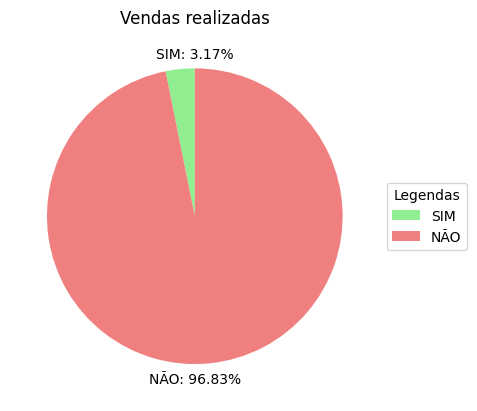

In [114]:

# Dados para o gráfico
dados = [3.17, 96.83]
rotulos = ['SIM', 'NÃO']
cores = ['lightgreen', 'lightcoral']

# Configurar o gráfico
fig, ax = plt.subplots()
p, texts, autotexts = ax.pie(dados, autopct='', startangle=90, colors=cores)

# Adicionar valores percentuais ao lado dos campos
for texto, dado, rotulo in zip(autotexts, dados, rotulos):
    texto.set_text(f'{rotulo}: {dado:.2f}%')
    if rotulo == 'SIM':
        texto.set_position((0, 1.1))  # Afastar 'SIM' para cima
    else:
        texto.set_position((0, -1.1))  # Afastar 'NÃO' para baixo

# Adicionar legenda ao lado
ax.legend(rotulos, title="Legendas", loc="center left", bbox_to_anchor=(1, 0.5))

# Exibir o gráfico
plt.title('Vendas realizadas')
plt.show()


In [115]:
df_grouped_convedito = df_grouped[df_grouped['VENDIDO'] != 'NÃO']
display(df_grouped_sem_nao)

,LEAD_ID,VENDIDO,ORIGEM,SUB-ORIGEM,MERCADO,LOCAL,PORTE,OBJETIVO
6,10572026,SIM,Google,google - cpc,0,Iomere - SC,51-300,Geração de leads b2b
11,10573985,SIM,Google,google - cpc,Varejo,Campinas - SP,11-50,Ações de marketing/vendas
53,10598070,SIM,Orgânico,0,Varejo,-,301-1000,Planejamento estratégico
58,10607404,SIM,Google,google - cpc,Varejo,São Paulo - SP,1-10,Abertura/Expansão
76,10620735,SIM,Google,google - cpc,0,Fortaleza - CE,1-10,Abertura/Expansão
...,...,...,...,...,...,...,...,...
2118,11902302,SIM,Orgânico,0,Varejo,São Luís - MA,1-10,Ações de marketing/vendas
2123,11906727,SIM,Google,google - cpc,Varejo,Niterói - RJ,1-10,Abertura/Expansão
2234,12012715,SIM,Orgânico,0,Franqueadora,Descalvado - SP,301-1000,Consultoria
2248,12020098,SIM,Orgânico,0,Varejo,Sao Goncalo - RJ,1-10,Abertura/Expansão


In [116]:
contagem_origem = df_grouped_sem_nao['ORIGEM'].value_counts()
print(contagem_origem)


Google               34
Orgânico             29
Bing                  2
Indicação             1
Leads                 1
GoogleGoogle          1
Inbound Marketing     1
OrgânicoOrgânico      1
email                 1
Facebook              1
Name: ORIGEM, dtype: int64


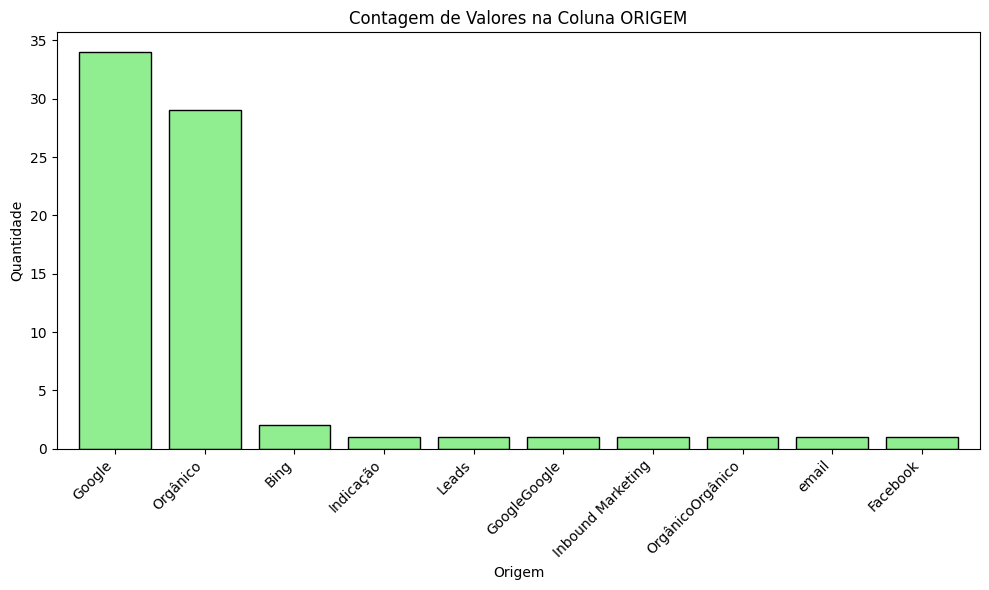

In [117]:
# Obter contagem de valores únicos na coluna 'ORIGEM'
contagem_origem = df_grouped_sem_nao['ORIGEM'].value_counts()

# Criar gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
contagem_origem.plot(kind='bar', ax=ax, color='lightgreen', width=0.8, edgecolor='black')

# Configurações adicionais para melhorar a legibilidade
ax.set_title('Contagem de Valores na Coluna ORIGEM')
ax.set_xlabel('Origem')
ax.set_ylabel('Quantidade')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Exibir o gráfico
plt.tight_layout()
plt.show()


# **insight 1**: 87,50% das vendas efetivadas possuem como origem o Google(47,2%) e Orgânico(40,27%)

In [100]:
contagem_local= df_grouped_sem_nao['LOCAL'].value_counts()
print(contagem_local)


São Paulo - SP                                    16
-                                                  5
Campinas - SP                                      5
Brasília - DF                                      3
Niterói - RJ                                       3
São Paulo, SP                                      2
Rio de Janeiro - RJ                                2
Recife - PE                                        2
Belo Horizonte - MG                                2
Rio Preto - SP                                     2
Limeira - SP                                       1
Macaé - RJ                                         1
Apucarana - PR                                     1
Araruama - RJ                                      1
Osasco - SP                                        1
Iomere - SC                                        1
Contagem - MG                                      1
Ribeirão Preto - SP                                1
RS                                            

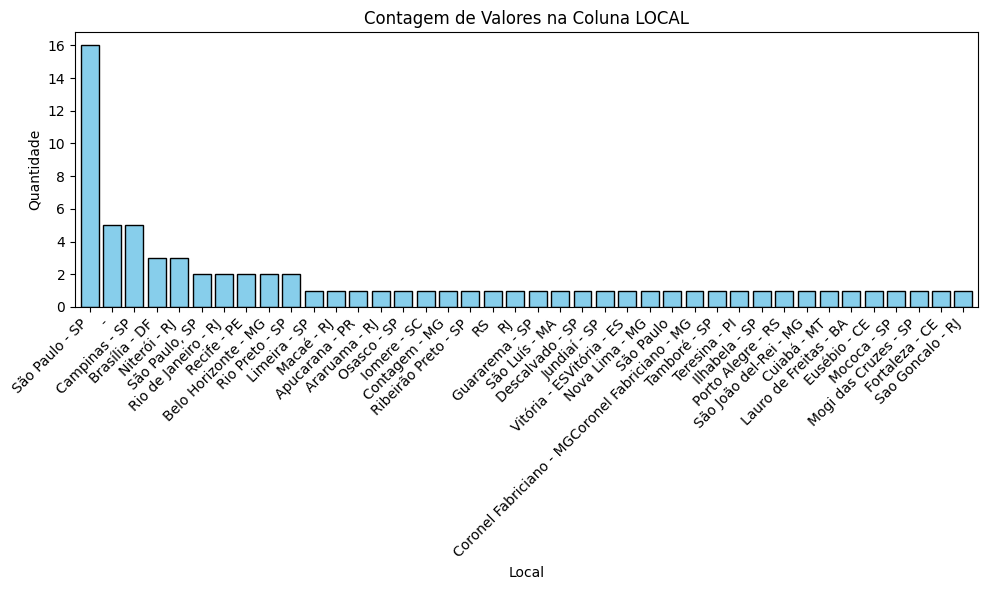

In [102]:
# Obter contagem de valores únicos na coluna 'LOCAL'
contagem_local = df_grouped_sem_nao['LOCAL'].value_counts()

# Criar gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))  # Ajuste o tamanho da figura conforme necessário
contagem_local.plot(kind='bar', ax=ax, color='skyblue', width=0.8, edgecolor='black')  # Ajuste a largura e a cor da borda

# Configurações adicionais para melhorar a legibilidade
ax.set_title('Contagem de Valores na Coluna LOCAL')
ax.set_xlabel('Local')
ax.set_ylabel('Quantidade')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Ajuste a rotação dos rótulos no eixo x

# Exibir o gráfico
plt.tight_layout()  # Ajuste automático de layout para evitar cortes
plt.show()


# **insight 2:** São Paulo representa 36% das vendas efetivadas

In [104]:
contagem_objetivo= df_grouped_sem_nao['OBJETIVO'].value_counts()
print(contagem_objetivo)

Abertura/Expansão                                     35
Planejamento estratégico                               9
Ações de marketing/vendas                              8
Consultoria                                            8
Geração de leads b2b                                   4
Outro                                                  4
0                                                      2
Ações de marketing/vendasAções de marketing/vendas     1
Abertura/ExpansãoAbertura/Expansão                     1
Name: OBJETIVO, dtype: int64


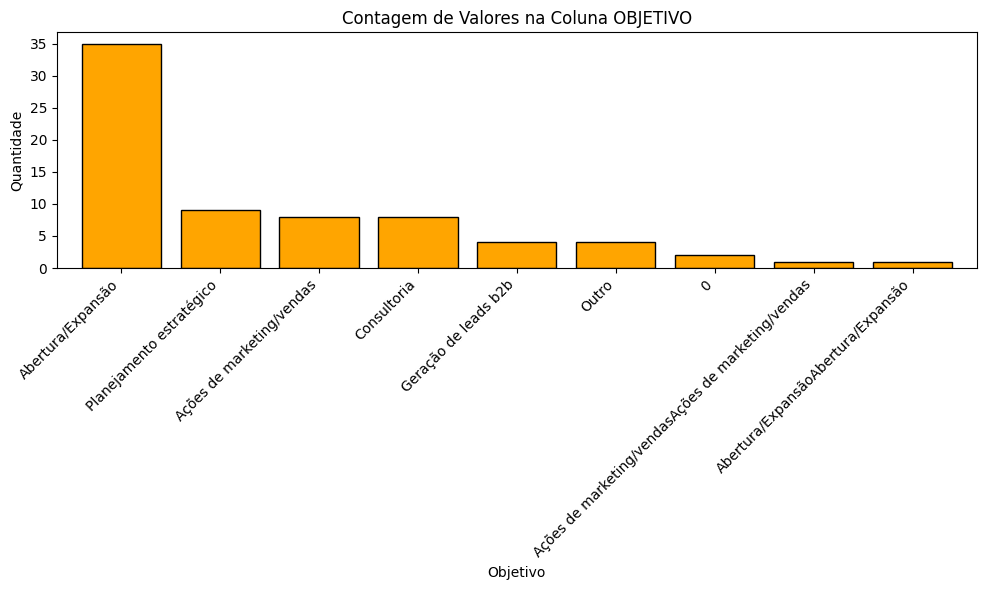

In [105]:
# Obter contagem de valores únicos na coluna 'OBJETIVO'
contagem_objetivo = df_grouped_sem_nao['OBJETIVO'].value_counts()

# Criar gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
contagem_objetivo.plot(kind='bar', ax=ax, color='orange', width=0.8, edgecolor='black')

# Configurações adicionais para melhorar a legibilidade
ax.set_title('Contagem de Valores na Coluna OBJETIVO')
ax.set_xlabel('Objetivo')
ax.set_ylabel('Quantidade')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Exibir o gráfico
plt.tight_layout()
plt.show()


# **insight 3:** Abertura/Expansão concentra quase metade das vendas convertidas pela empresa.

In [106]:
contagem_mercado= df_grouped_sem_nao['MERCADO'].value_counts()
print(contagem_mercado)


Servicos                                 14
Franqueadora                             12
Empreendedor                             10
Varejo                                    9
Marketing/Publicidade/Consultoria         9
Industria                                 6
Tecnologia                                5
Imobiliaria/Incorporadora/Construtora     3
0                                         2
ServicosServicos                          2
Name: MERCADO, dtype: int64


# **Conclusão e recomendação a Empresa**



**Insight 1: Origem das Vendas**

Google e Orgânico: Concentrando esforços nas fontes de origem mais eficazes, recomendo focar em campanhas de marketing direcionadas ao Google e ao tráfego orgânico. Essas fontes representam uma parcela significativa (87,50%) das vendas efetivadas, com 47,2% e 40,27%, respectivamente. Investimentos adicionais em otimização de SEO para aumentar a visibilidade orgânica e estratégias específicas para anúncios no Google podem ampliar ainda mais esses resultados.

**Insight 2: Regionalização em São Paulo**

São Paulo: Dada a representação expressiva de São Paulo, responsável por 36% das vendas efetivadas, sugiro uma abordagem regionalizada. Estratégias de marketing personalizadas para o público de São Paulo, considerando características específicas da região, podem gerar resultados mais expressivos. Campanhas localizadas, eventos regionais e parcerias com empresas locais podem ser explorados para fortalecer a presença e atrair leads qualificados.

**Insight 3: Foco em Abertura/Expansão**

Abertura/Expansão: Considerando que quase metade das vendas convertidas estão relacionadas a leads com o objetivo de Abertura/Expansão, é recomendável direcionar esforços para atender a essa demanda específica. Desenvolver campanhas e conteúdos personalizados que abordem as necessidades e preocupações desse público pode resultar em uma maior taxa de conversão. Estratégias como webinars, guias práticos e cases de sucesso relacionados à abertura ou expansão de negócios podem ser eficazes.

**Considerações Gerais:**

**Segmentação de Audiência:** Utilize a segmentação de audiência de maneira mais precisa, personalizando campanhas com base nos perfis de leads e clientes mais convertidos. Considere a criação de personas específicas para cada segmento, adaptando mensagens e ofertas de acordo com suas características.

**Avaliação Contínua: **Mantenha uma abordagem de avaliação contínua dos dados e métricas. Acompanhe de perto o desempenho das campanhas, ajustando as estratégias conforme necessário. A implementação de testes A/B pode ser valiosa para identificar as táticas mais eficazes.

**Integração de Canais:** Considere uma abordagem integrada, combinando esforços em diferentes canais de marketing, como redes sociais, e-mail marketing e campanhas pagas. A sinergia entre esses canais pode fortalecer a presença da marca e melhorar a eficácia das campanhas.

